# Linear Regression

## Imports

In [77]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [78]:
datafile = "lausanne-appart.csv"

Read the data

In [79]:
dataset = pd.read_csv(datafile)

Display first rows

In [80]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [81]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

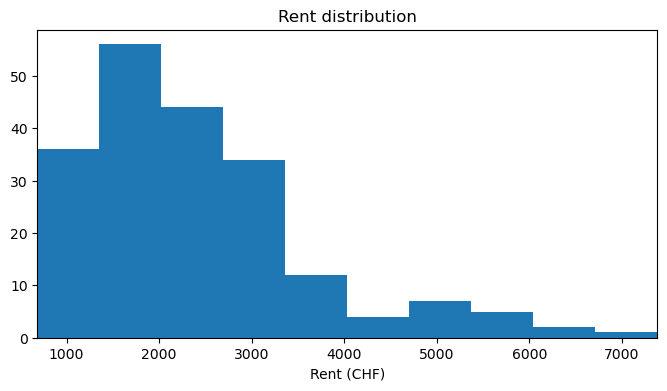

In [82]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

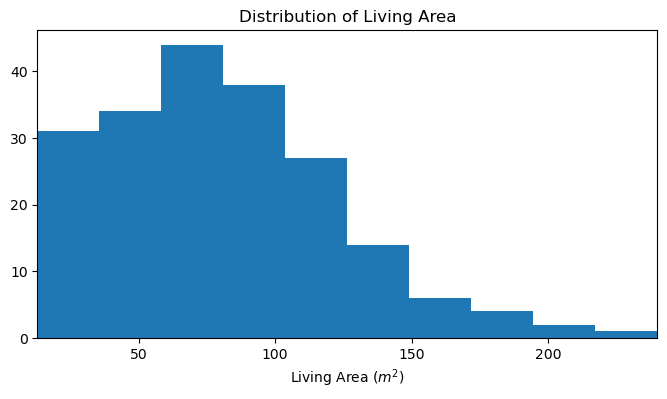

In [83]:
# Your code here
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living Area ($m^2$)")
plt.title("Distribution of Living Area")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

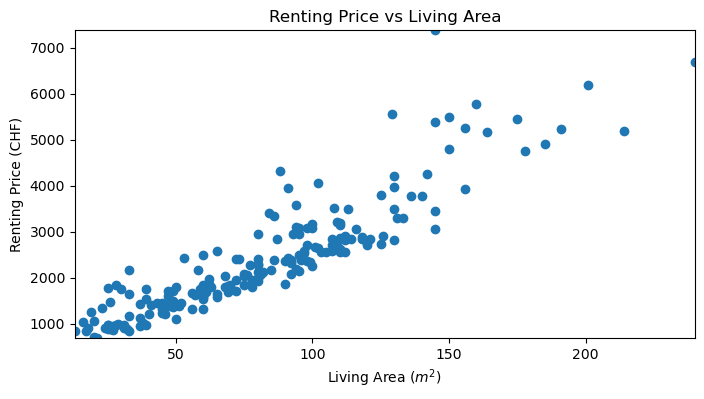

In [84]:
# Your code here
plt.figure(1, figsize=(8, 4))
plt.scatter(living_area, rent_price)
plt.title("Renting Price vs Living Area")
plt.xlabel("Living Area ($m^2$)")
plt.ylabel("Renting Price (CHF)")
plt.xlim(np.min(living_area), np.max(living_area))
plt.ylim(np.min(rent_price),np.max(rent_price))
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of Part 1.

[240.07710727  26.33242457]


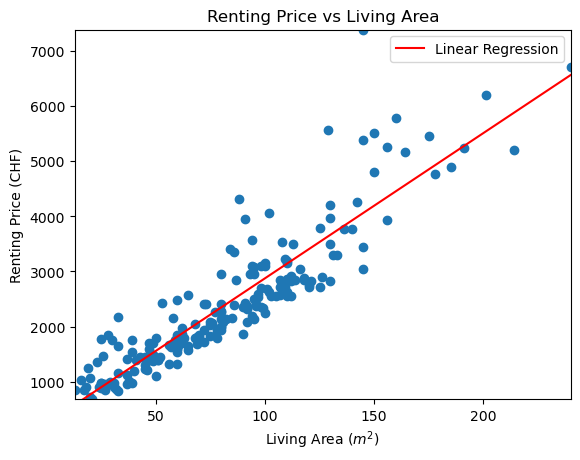

In [85]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - get N, the number of samples                                     #
#  - compose X with the 1st column full of 1.0 and the 2nd column     #
#    with the living area (hint: have a look to no.ones() and         #
#    np.column_stack()                                                #
#  - get y as the rent prices                                         #
#  - compute the theta (hint: matrix A to matrix B multiplication can #
#    be done with A.dot(B))                                           #
#  - plot the line (hint: compute a set of x points linearly spaced   #
#    and, with the thetas, compute the corresponding y values)        #
#######################################################################
N = len(living_area)
one_array = np.ones(N)

X = np.column_stack((one_array, living_area))
y = rent_price

# Compute the tetha: 
part_1 = np.linalg.inv((X.T).dot(X))
part_2 = (X.T).dot(y)
theta = part_1.dot(part_2)
print(theta)

# Create an array of linearly spaced numbers:
x_spaced = np.linspace(0,max(living_area),20)


# Use formula given by: hθ(x) = $θ0 + θ1x
y_hat = theta[0] + theta[1]*x_spaced  


# Your code here
plt.scatter(living_area, rent_price)
plt.title("Renting Price vs Living Area")
plt.xlabel("Living Area ($m^2$)")
plt.ylabel("Renting Price (CHF)")
plt.plot(x_spaced, y_hat, 'r', label="Linear Regression")
plt.xlim(np.min(living_area), np.max(living_area))
plt.ylim(np.min(rent_price),np.max(rent_price))
plt.legend()
plt.show()

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

b) Compute the MSE loss according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [87]:
#######################################################################
# TODO:                                                               #
#  - define a function h_theta(x, theta_0, theta_1) to compute the    #
#    the hypothesised values of y (the "y_hat")                       #
#  - define a function mse_loss(x, y, y_hat)                          #
#  - use both functions to compute the MSE loss on the dataset        #
#######################################################################
def h_theta(x, theta_0, theta_1):
    """
    This function calculates the predicted y values (y_hat)
    X.
    """
    return theta_0 + x*theta_1 

def mse_loss(x,y,y_hat):
    """Calculates the MSE"""
    return (1/(2*N))*(np.sum((y-y_hat)**2))
    
y_hat = h_theta(living_area,theta[0],theta[1])
mse = mse_loss(living_area,rent_price,y_hat)
print(f"The MSE loss is {mse}")


#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

The MSE loss is 138034.95779787414


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

tensor([[ 26.3324],
        [240.0772]])


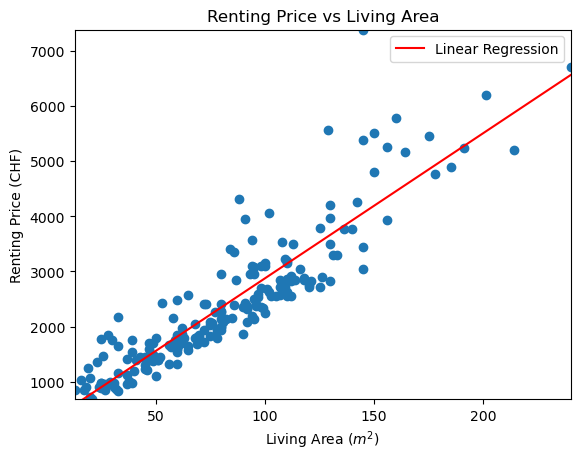

The MSE loss is 138034.95779791905


In [88]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - in a similar way as in the previous part 2, compute theta0 and   #
#    theta1, plot the computed line                                   #
#  - compute the loss J with these new values of theta0 and theta1,   #
#    for that you may use mse_loss() function defined abouve          #
#######################################################################
import torch

# Defining empty tensors:
x,y = torch.empty(N,2), torch.empty(N,1)

# Tensors for living area and rent price:
living_area_tensor = torch.tensor(living_area)
rent_price_tensor = torch.tensor(rent_price)

# Creating X and y:
x[:,0] = living_area_tensor
x[:,1] = 1
y[:,0] = rent_price_tensor

sol = torch.linalg.lstsq(x,y).solution
tetha0 = sol[1,0].item()
tetha1 = sol[0,0].item()
print(sol)

# Create an array of linearly spaced numbers:
x_spaced = np.linspace(0,max(living_area),20)

# Use formula given by: hθ(x) = $θ0 + θ1x
y_hat = tetha0 + tetha1*x_spaced  

# Your code here
plt.scatter(living_area, rent_price)
plt.title("Renting Price vs Living Area")
plt.xlabel("Living Area ($m^2$)")
plt.ylabel("Renting Price (CHF)")
plt.plot(x_spaced, y_hat, 'r', label="Linear Regression")
plt.xlim(np.min(living_area), np.max(living_area))
plt.ylim(np.min(rent_price),np.max(rent_price))
plt.legend()
plt.show()


# Calculate the MSE 
y_hat = h_theta(living_area_tensor.numpy(),tetha0,tetha1)
mse = mse_loss(living_area_tensor.numpy(),rent_price_tensor.numpy(),y_hat)
print(f"The MSE loss is {mse}")

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################